In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


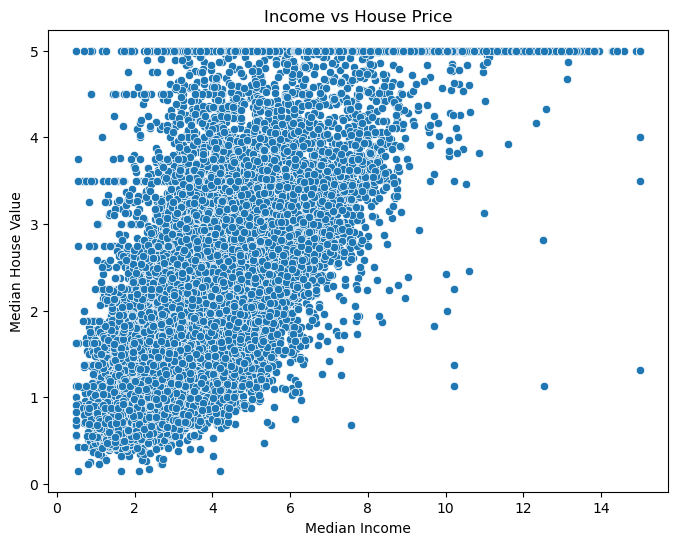

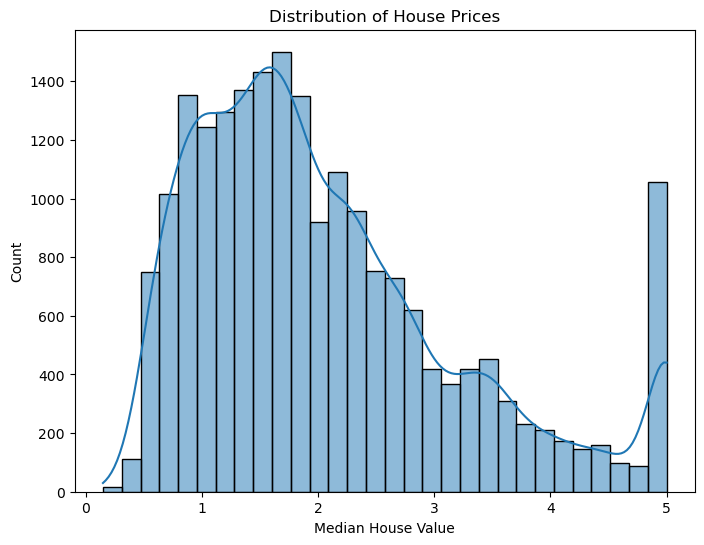

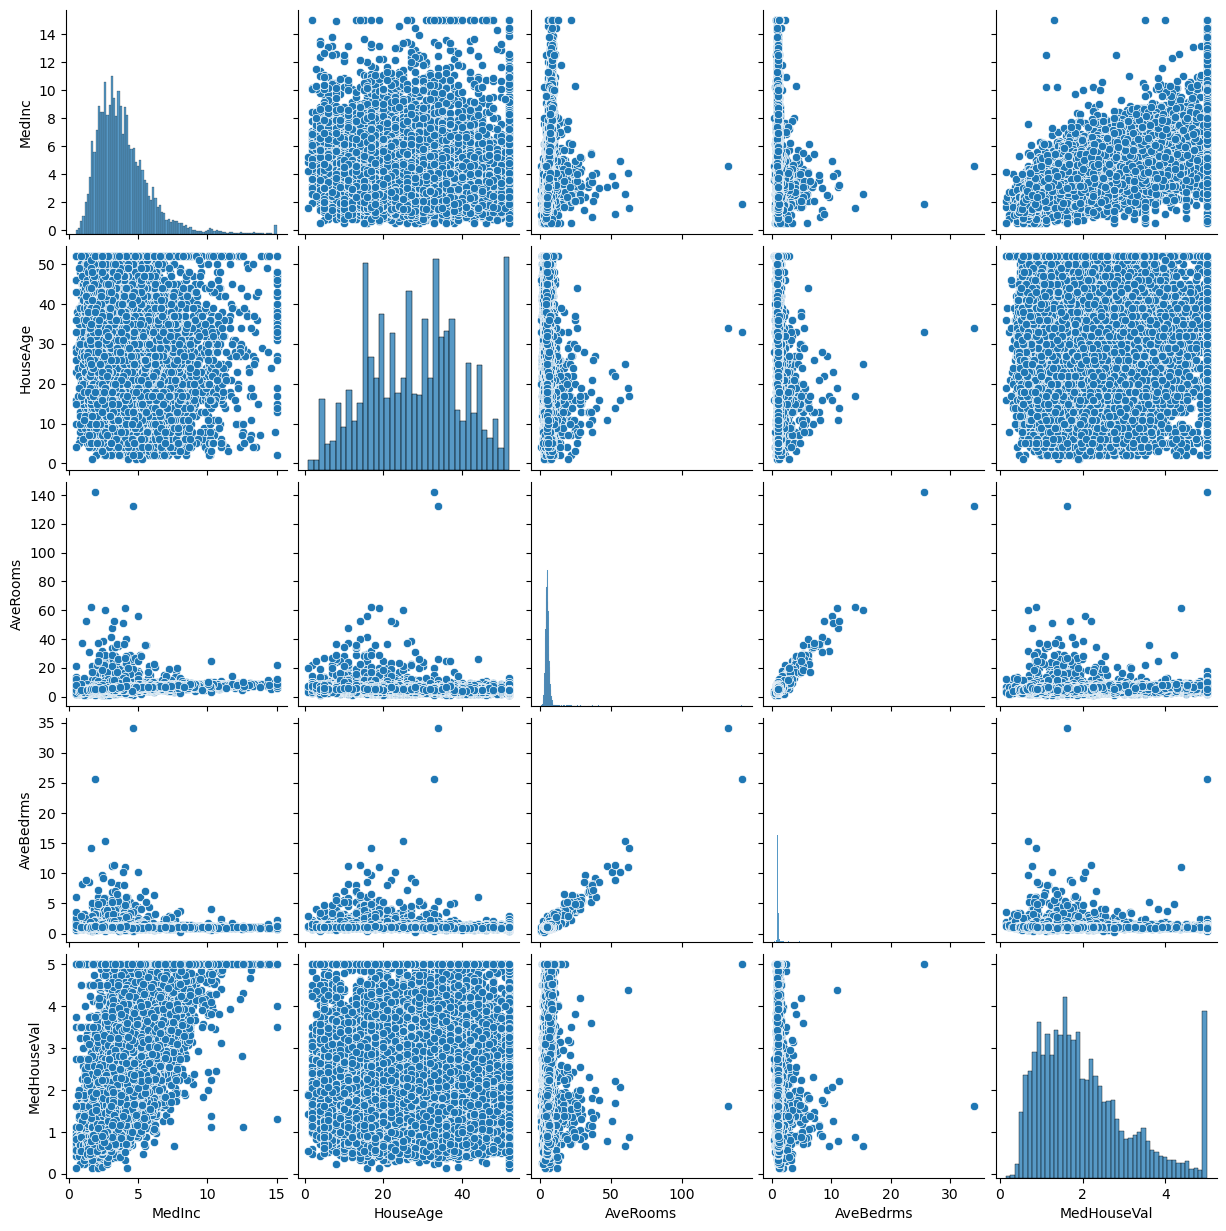

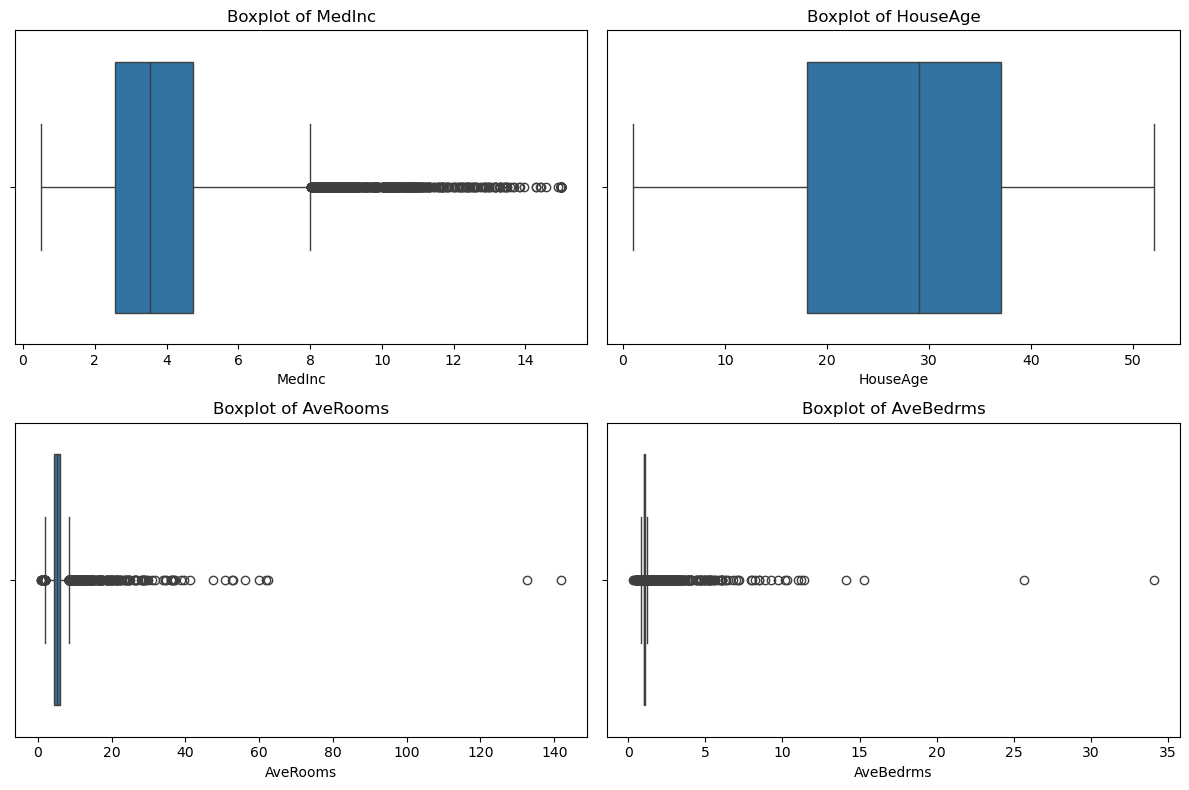

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names) #(row,columns)

df['MedHouseVal'] = housing.target #use target term to predict and add in MedHouseVal

df.head() #show first few rows of data

df.describe() #show summary statistics

df.isnull().sum() #check null/missing value, cum=count 

# Scatter plot: Median Income vs Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title('Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Histogram: Distribution of House Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']])
plt.show()

# Preprocessing (Data cleaning)
# Define the features to check for outliers
features_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']

# Create boxplots for each feature
plt.figure(figsize=(12, 8))  # Set figure size
for i, feature in enumerate(features_to_check):
    plt.subplot(2, 2, i + 1)  # Arrange plots in a 2x2 grid
    sns.boxplot(x=df[feature])  # Create a boxplot for the feature
    plt.title(f'Boxplot of {feature}')  # Add a title to the plot

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Build the regression model




             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

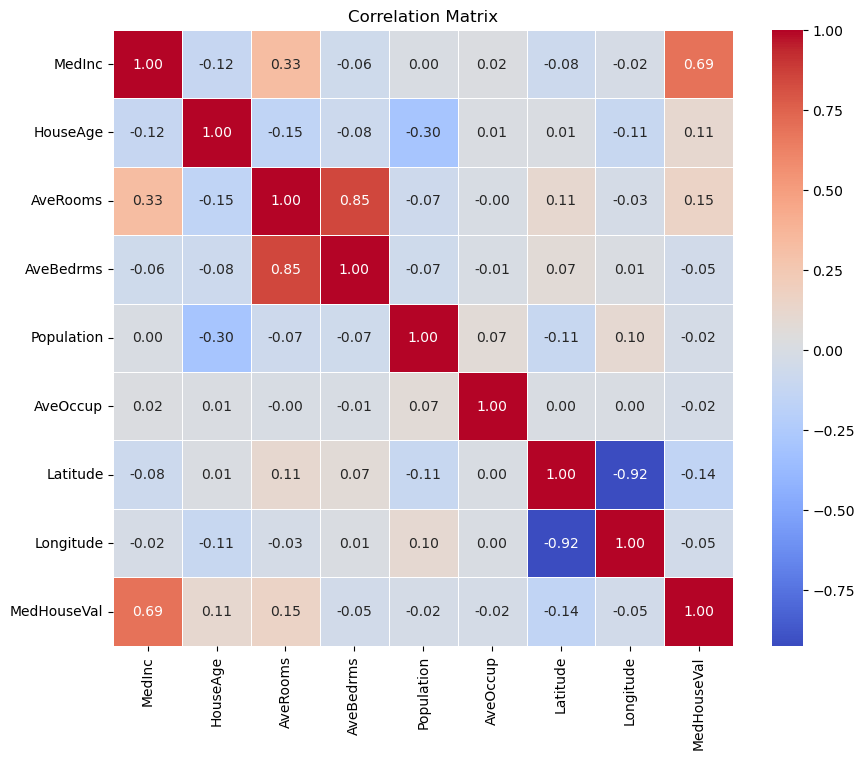

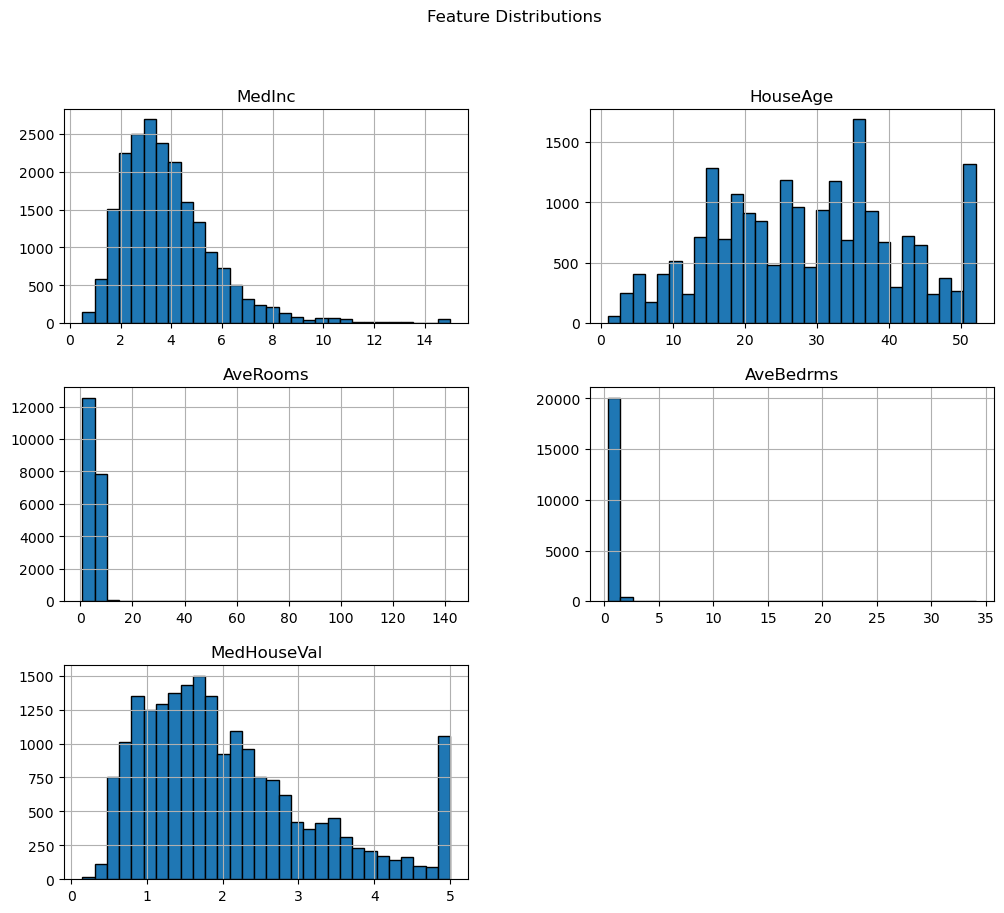

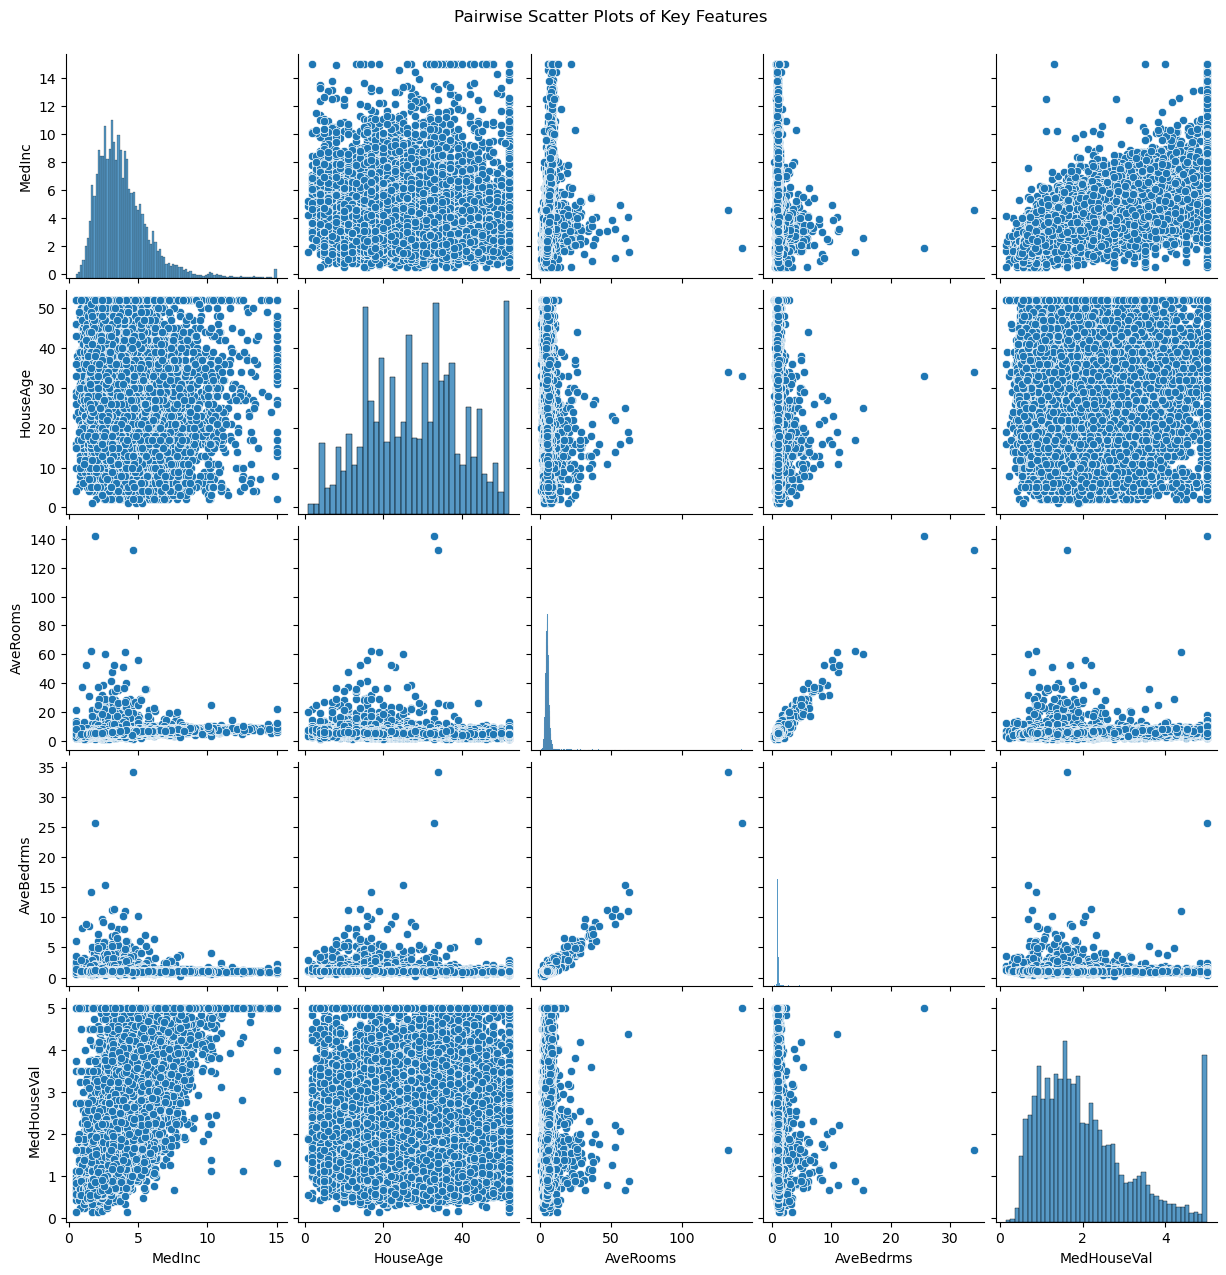

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset again
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)  # Create the DataFrame

df['MedHouseVal'] = housing.target  # Add the target column

# Summary statistics
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Calculate percentage of missing values
missing_percentage = (missing_values / df.shape[0]) * 100
print(f"Percentage of missing values:\n{missing_percentage}")

# Correlation matrix: Check the relationships between features and target variable
correlation_matrix = df.corr()
print(f"Correlation matrix:\n{correlation_matrix}")

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of features (Visualizing distributions of key features)
features_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']
df[features_to_plot].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Plot the pairwise correlations (Scatter plot matrix)
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']])
plt.suptitle('Pairwise Scatter Plots of Key Features', y=1.02)
plt.show()



Mean Squared Error: 0.6435680467793011
R-squared: 0.5088800081000433


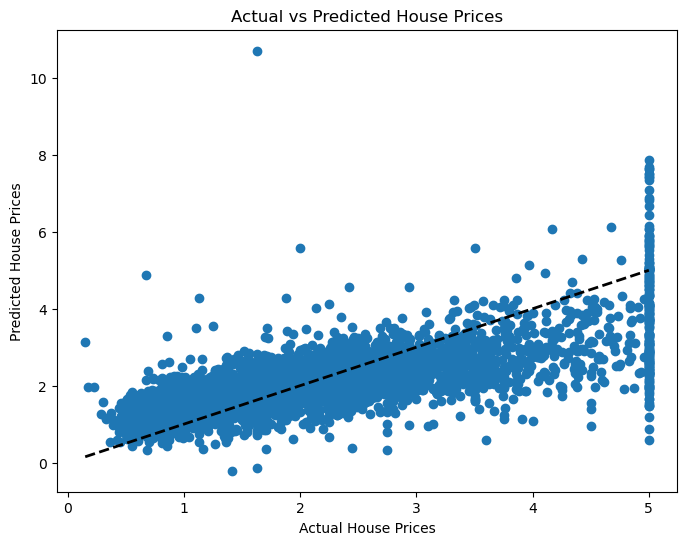

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data into training and testing sets
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']]  # Features
y = df['MedHouseVal']  # Target variable

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the linear regression model
model = LinearRegression()

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()
        

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Create new features
df['RoomToBedRatio'] = df['AveRooms'] / df['AveBedrms']
df['PopPerHousehold'] = df['Population'] / df['AveOccup']

# Step 2: Update features (X) to include new columns
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'RoomToBedRatio', 'PopPerHousehold']]
y = df['MedHouseVal']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the model
model = LinearRegression()

# Step 5: Train the updated model
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the updated model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 0.599994309144421
R-squared: 0.5421320220578336


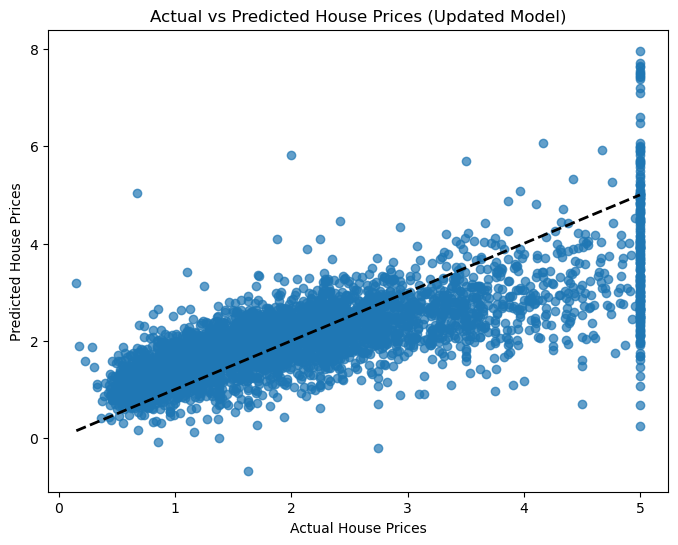

In [23]:
import matplotlib.pyplot as plt

# Plot for the initial model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted House Prices (Updated Model)')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()
